# Black-Scholes Option Pricing

In this notebook I will go through the basics of Black-Scholes derivative pricing,
using the case of European put and call options as a simple example.

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from black_scholes import call_european, put_european

%matplotlib inline

### Call option dependence on parameters

In the Black-Scholes model, the price of a call option depends on:
 1. $S$ : The price of the underlying
 2. $K$ : The strike price 
 3. $\sigma$ : The volatility 
 4. $T$ : Time to expiration
 5. $r$ : Risk-free rate of return
 6. $q$ : Continuous rate of dividend returns (if at all) 
 7. Discounted value of any dividend payouts (if at all) [Not yet implemented]
 
The basic formula is
$$ c = Se^{-qT}\Phi(d_1) - Ke^{-rT}\Phi(d_2) $$

where $\Phi$ is the cumulative distribution function of the unit normal distribution
$$ \Phi(z) \equiv \int_{-\infty}^z \frac{e^{-\frac{1}{2}x^2}}{\sqrt{2\pi}} {\rm d}x $$
and
$$ d_1 = \frac{1}{\sigma\sqrt{T}}\left[\ln(S/K) + \left(r-q+\frac{\sigma^2}{2}\right)T\right] $$
$$ d_2 = \frac{1}{\sigma\sqrt{T}}\left[\ln(S/K) + \left(r-q-\frac{\sigma^2}{2}\right)T\right] = d_1 - \sigma\sqrt{T}$$

It is straightforward to see that 
 - $\Delta \equiv \frac{\partial c}{\partial S} = \Phi(d_1)$, and
 - $\Phi(d_2)$ is the probability that the option will be exercised at maturity
 
*NOTE*: When we approach maturity, we can run into numerical problems if we try to naively evaluate this expression.

For a physicist, it is natural to try and reduce the number of independent parameters this expression depends on.
In particular, note the only the parameter combinations $Se^{-qT}$, $Ke^{-rT}$ and $\sigma\sqrt{T}$ appear (ignoring dividends with a known present value).  Therefore, if we define
 - $\bar{S} \equiv Se^{-qT}$
 - $\bar{K} \equiv Ke^{-rT}$
 - $\bar{\sigma} \equiv \sigma\sqrt{T}$

we have
$$ c = \bar{S}\Phi(d_1) - \bar{K}\Phi(d_2) $$
with
$$ d_1 = \frac{1}{\bar{\sigma}}\left[\ln\left(\bar{S}/\bar{K}\right) + \frac{\bar{\sigma}^2}{2} \right] $$
$$ d_2 = \frac{1}{\bar{\sigma}}\left[\ln\left(\bar{S}/\bar{K}\right) - \frac{\bar{\sigma}^2}{2} \right] $$
which only depends on 3 independent parameters instead of 6.

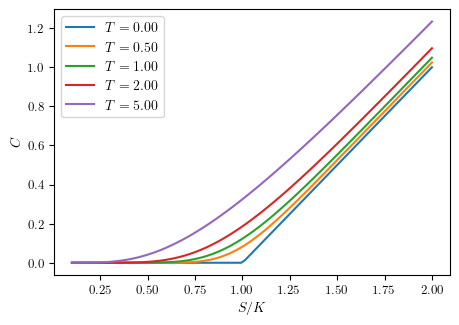

In [37]:
sVals = np.linspace(0.1,2.,101)

for t in [0.,0.5, 1., 2., 5.]:
    plt.plot(sVals, call_european(sVals, 1., 0.05, 0.25, t), label=r'$T=%.2f$' % t)
    
plt.xlabel(r'$S/K$'); plt.ylabel(r'$C$')
plt.legend()

plt.show()

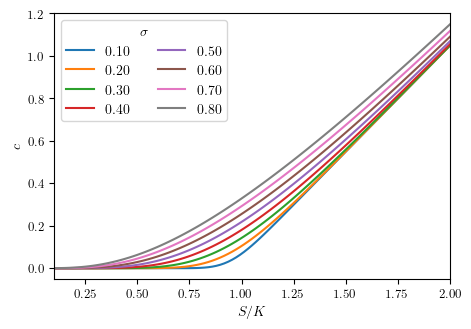

In [44]:
for s in np.linspace(0.1,0.8,8):
    plt.plot(sVals, call_european(sVals, 1., 0.05, s, 1.), label=r'$%.2f$'%s)
    
plt.xlabel(r'$S/K$'); plt.ylabel(r'$c$')

plt.ylim(-0.05,1.2); plt.xlim(sVals[0],sVals[-1])
plt.legend(title=r'$\sigma$',ncols=2)

plt.show()

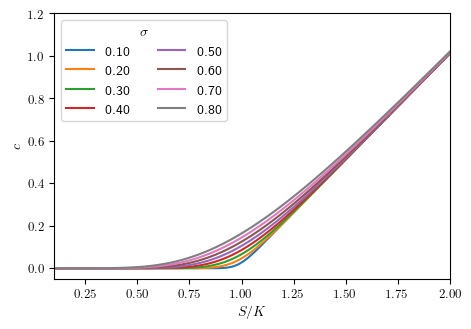

In [45]:
for s in np.linspace(0.1,0.8,8):
    plt.plot(sVals, call_european(sVals, 1., 0.05, s, 0.25), label=r'%.2f'%s)
    
plt.xlabel(r'$S/K$'); plt.ylabel(r'$c$')

plt.xlim(sVals[0],sVals[-1]); plt.ylim(-0.05,1.2)
plt.legend(title=r'$\sigma$', ncols=2)

plt.show()

## Options Combinations (Payoffs)

In [46]:
def call_payoff(s,k):
    return np.max(s-k,0,axis=-1)

def put_payoff(s,k):
    return np.max(k-s,0,axis=-1)


### Bull Spread

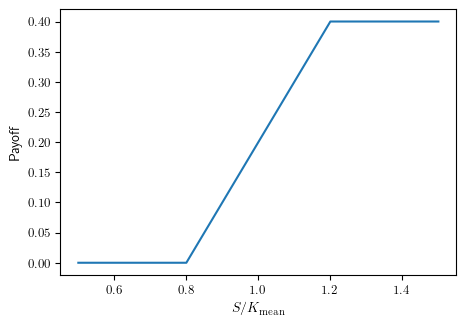

In [82]:
sVals = np.linspace(0.5,1.5,101)
z = np.zeros_like(sVals)

k=0.8
c1 = np.max(np.vstack([sVals-k,z]).T, axis=-1)
k=1.2
c2 = np.max(np.vstack([sVals-k,z]).T, axis=-1)

plt.plot(sVals, c1-c2)
plt.xlabel(r'$S/K_{\rm mean}$')
plt.ylabel(r'Payoff')

plt.show()

### Bear Spread

### Butterfly Spread

# Monte Carlo Approach

# Generating Brownian Motions